In [1]:
import os
import sys
import numpy as np
import torch
import ast
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
sys.path.append("../authorship_attribution/")
sys.path.append("../obfuscated_ast_similarity//")

In [3]:
import model as ast_model
import train as ast_train
import utilities as ast_utilities
import obfuscation
import json
import obfuscated_trainer

In [4]:
original_path = "../authorship_attribution/experiments/GCJ-108/plain/"

In [5]:
# complete_model = ast_utilities.load_plain_model(complete_model, )
# model_params = json.loads(open(os.path.join(path, "components", "ast_encoder_params.json")).read())
model_params = json.loads(open(os.path.join(original_path, "best_state", "components", "ast_encoder_params.json")).read())


In [6]:
ast_encoder = ast_model.ASTEncoder(model_params)
ast_encoder.load(os.path.join(original_path, "best_state", "components"))

In [7]:
batcher = obfuscated_trainer.Batcher({}, 0.8)
batcher.load_from_attribution_batcher(original_path)
# batcher.load_from_attribution_batcher("../authorship_attribution/experiments/GCJ-108/regularized-sep-coef-names/")
# batcher.load(original_path)

In [8]:
# batcher.train_data

In [9]:
# data = ast_utilities.read_all_gcj()

In [10]:
# data = ast_utilities.filter_by_count(data, 15, 1000)
# batcher = obfuscated_trainer.Batcher(data, 0.8)

In [12]:
# obfuscation_params = {
#     'add_kvargs':0.5,
#     'add_args':0.5,
#     'args_max_add':5,
#     'add_call_args':0.5,
#     'call_args':3,
#     'call_kwargs':3,
#     'if_swap':0.5,
#     'modify_body':0.5,
#     'n_modification_depth':3,
#     'max_trash_to_body':3,
#     'swap_in_body':0.5
# }

# obfuscation_params = {
#     'add_kvargs':0.8,
#     'add_args':0.8,
#     'args_max_add':8,
#     'add_call_args':0.8,
#     'call_args':5,
#     'call_kwargs':5,
#     'if_swap':0.7,
#     'modify_body':0.7,
#     'n_modification_depth':5,
#     'max_trash_to_body':5,
#     'swap_in_body':0.6
# }

# obfuscation_params = {
#     'add_kvargs':0.3,
#     'add_args':0.3,
#     'args_max_add':3,
#     'add_call_args':0.5,
#     'call_args':3,
#     'call_kwargs':3,
#     'if_swap':0.4,
#     'modify_body':0.4,
#     'n_modification_depth':2,
#     'max_trash_to_body':5,
#     'swap_in_body':0.5
# }

obfuscation_params = {
    'add_kvargs':0.2,
    'add_args':0.2,
    'args_max_add':3,
    'add_call_args':0.5,
    'call_args':3,
    'call_kwargs':3,
    'if_swap':0.3,
    'modify_body':0.4,
    'n_modification_depth':2,
    'max_trash_to_body':2,
    'swap_in_body':0.5
}


# obfuscation_params = {
#     'add_kvargs':0.0,
#     'add_args':0.0,
#     'args_max_add':0,
#     'add_call_args':0.0,
#     'call_args':0,
#     'call_kwargs':0,
#     'if_swap':0.0,
#     'modify_body':0.0,
#     'n_modification_depth':0,
#     'max_trash_to_body':0,
#     'swap_in_body':0.0
# }



In [13]:
# print()

In [14]:
long_names = obfuscated_trainer.order_names_by_count(batcher)

In [ ]:
validation_before = obfuscated_trainer.validate(ast_encoder, batcher, long_names, obfuscation_params, max_for_user=100, n_obfuscated=2)

In [15]:

# trainer_params = dict(
#     n_epochs = 200,
#     n_obfuscated = 25,
#     validate_every = 5,
#     n_problems_validation = 50,
#     validate_n_problems = 50,
#     train_n_problems = 50,
#     regularizer_coef = 0.001,
#     n_adversarial = 100,
#     adversarial_coef = 1
# )


trainer_params = dict(
    n_epochs = 200,
    n_obfuscated = 25,
    validate_every = 5,
    n_problems_validation = 50,
    validate_n_problems = 10,
    train_n_problems = 10,
    regularizer_coef = 0.000,
    n_adversarial = 10,
    adversarial_coef = 1
)


In [16]:
track_metric = {
    "metric_name":"loss",
    "function":ast_train.validate_max
}

In [17]:
# batcher = obfuscated_trainer.Batcher(data, 0.8)
!ls

Anytask-on-Anytask.ipynb	  GCJ-108-only-positive.ipynb
Anytask-on-GCJ-108.ipynb	  GCJ-108-params-1.ipynb
experiments			  GCJ-108-Subseq.ipynb
GCJ-108-from_scratch.ipynb	  mix_code.ipynb
GCJ-108.ipynb			  most_common_names_all_datasets.pkl
GCJ-108-mixing-code.ipynb	  obfuscated_trainer.py
GCJ-108-more-negative.ipynb	  obfuscation.py
GCJ-108-more-negative-more.ipynb  __pycache__
GCJ-108-names.ipynb		  training_obfuscated_ast_discriminator.ipynb
GCJ-108-only-negative.ipynb


In [18]:
path = "./experiments/gcj_108_108/pure/params/params1"
if os.path.exists(path):
    raise ValueError()

In [19]:
trainer = obfuscated_trainer.Trainer(ast_encoder, torch.optim.Adam(ast_encoder.parameters()), path=path, track_metric=track_metric)

In [20]:
# trainer.load(os.path.join(path, "last_state"))

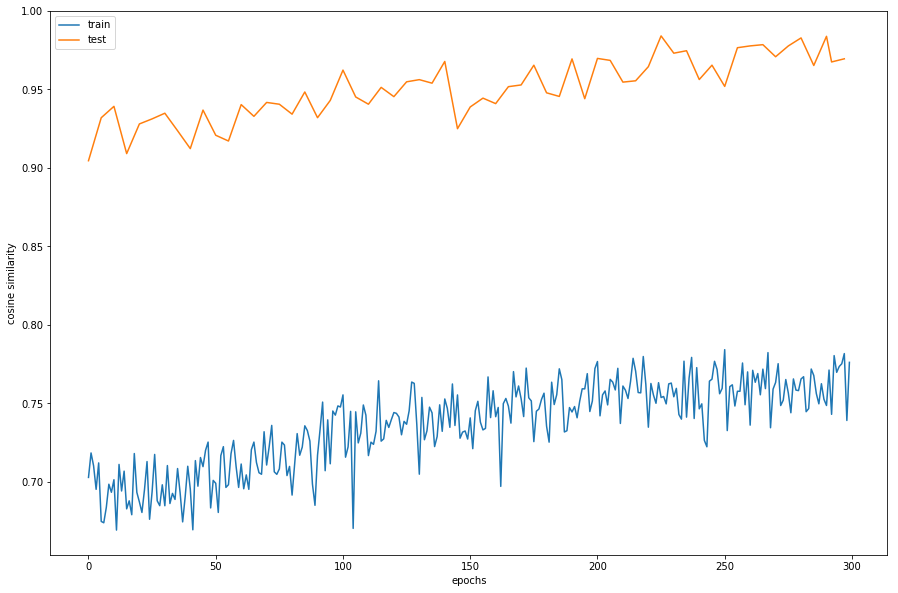

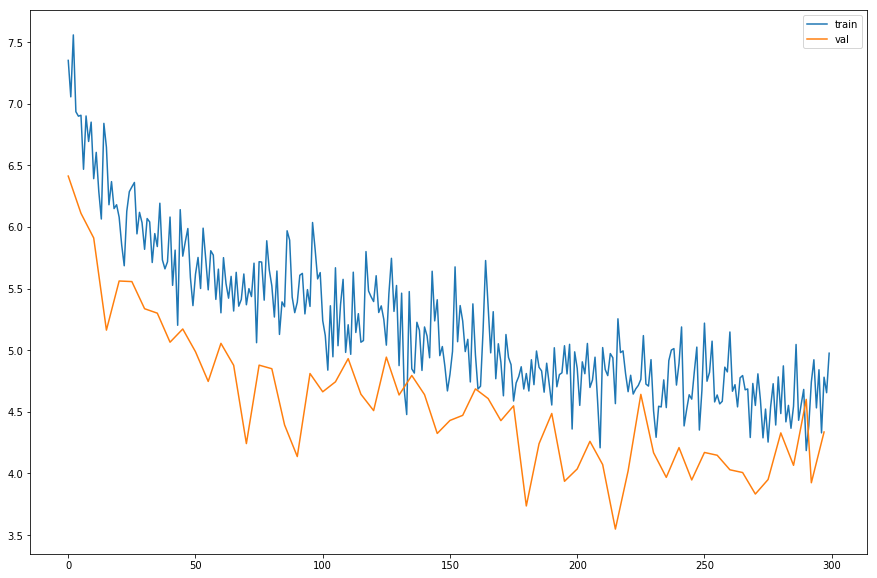

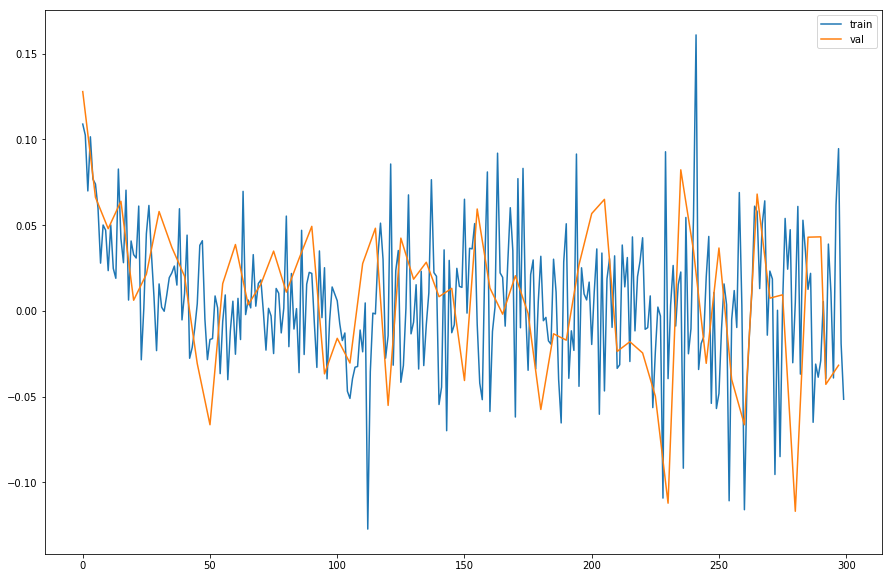

KeyboardInterrupt: 

In [23]:
trainer.train(batcher, trainer_params, obfuscation_params)

In [ ]:
validation_result = obfuscated_trainer.validate(ast_encoder, batcher, long_names, obfuscation_params, max_for_user=100, n_obfuscated=5)